In [1]:
import math
import random
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
df= pd.read_csv('/content/drive/MyDrive/Education Spending/Dataset_Without_Lagged_Variables.csv')

In [21]:
df

,STATE,YEAR,real GDP(in billion U.S. dollars),ENROLL,TOTAL_EXPENDITURE,PER_CAPITA_EXPENDITURE,INSTRUCTION_EXPENDITURE_RATIO,SUPPORT_SERVICES_EXPENDITURE_RATIO,CAPITAL_OUTLAY_EXPENDITURE_RATIO
0,Alabama,2000,157.22,730184,5003267,6.852063,0.510009,0.263638,0.132694
1,Alabama,2001,156.85,728532,5086045,6.981224,0.522291,0.270203,0.106229
2,Alabama,2002,160.42,726367,5147821,7.087080,0.528522,0.274795,0.096380
3,Alabama,2003,165.13,727900,5298932,7.279753,0.531638,0.287126,0.081579
4,Alabama,2004,176.63,730418,5450269,7.461849,0.527606,0.290014,0.082495
...,...,...,...,...,...,...,...,...,...
845,Wyoming,2012,38.86,89994,1670728,18.564882,0.506247,0.323518,0.127636
846,Wyoming,2013,38.85,91533,1675477,18.304622,0.505451,0.326129,0.127677
847,Wyoming,2014,39.56,92732,1775999,19.151954,0.487575,0.312929,0.162149
848,Wyoming,2015,40.42,93867,1942406,20.693172,0.461237,0.291128,0.210782


In [22]:
# Check the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Check the column names
print("\nColumn names:")
print(df.columns)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check the data types
print("\nData types:")
print(df.dtypes)

# Summary statistics
print("\nSummary statistics:")
print(df.describe())


First 5 rows of the dataset:
     STATE  YEAR  real GDP(in billion U.S. dollars)  ENROLL  \
0  Alabama  2000                             157.22  730184   
1  Alabama  2001                             156.85  728532   
2  Alabama  2002                             160.42  726367   
3  Alabama  2003                             165.13  727900   
4  Alabama  2004                             176.63  730418   

   TOTAL_EXPENDITURE  PER_CAPITA_EXPENDITURE  INSTRUCTION_EXPENDITURE_RATIO  \
0            5003267                6.852063                       0.510009   
1            5086045                6.981224                       0.522291   
2            5147821                7.087080                       0.528522   
3            5298932                7.279753                       0.531638   
4            5450269                7.461849                       0.527606   

   SUPPORT_SERVICES_EXPENDITURE_RATIO  CAPITAL_OUTLAY_EXPENDITURE_RATIO  
0                            0.263638      

In [23]:
# Define the target column
target_column = 'real GDP(in billion U.S. dollars)'

# Exclude the Year column and the target column from features
features_columns = [col for col in df.columns if col not in [target_column, 'YEAR','STATE']]

# Separate features and target
X = df[features_columns]
y = df[target_column]

# Print shapes to confirm
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (850, 6)
Target shape: (850,)


<font color= "lime"> <h1> <b> LSTM



In [24]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Initialize scalers
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))

# Normalize features and target
X_normalized = scaler_features.fit_transform(X)
y_normalized = scaler_target.fit_transform(y.values.reshape(-1, 1))  # Reshape target for scaler

# Confirm normalization
print("Normalized Features (first 5 rows):\n", X_normalized[:5])
print("Normalized Target (first 5 rows):\n", y_normalized[:5])

# Reshape features for LSTM (samples, timesteps, features)
timesteps = 1  # Define timesteps (1 if no additional sequential data)
X_reshaped = X_normalized.reshape((X_normalized.shape[0], timesteps, X_normalized.shape[1]))

print("\nReshaped Features for LSTM:", X_reshaped.shape)


Normalized Features (first 5 rows):
 [[0.10958022 0.05006899 0.06816602 0.50898528 0.1596227  0.41753526]
 [0.10931645 0.05104803 0.07345299 0.55381868 0.18290752 0.32767978]
 [0.10897078 0.05177868 0.07778603 0.57656615 0.19919385 0.29424047]
 [0.10921555 0.05356591 0.08567277 0.58794076 0.24293292 0.24398662]
 [0.10961758 0.05535582 0.09312658 0.57322363 0.25317575 0.24709772]]
Normalized Target (first 5 rows):
 [[0.05580343]
 [0.05564958]
 [0.05713407]
 [0.05909259]
 [0.06387455]]

Reshaped Features for LSTM: (850, 1, 6)


In [25]:
from sklearn.model_selection import train_test_split

# Split the reshaped data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_normalized, test_size=0.2, random_state=42, shuffle=False
)

# Print shapes to confirm
print("Training Features shape:", X_train.shape)
print("Testing Features shape:", X_test.shape)
print("Training Target shape:", y_train.shape)
print("Testing Target shape:", y_test.shape)


Training Features shape: (680, 1, 6)
Testing Features shape: (170, 1, 6)
Training Target shape: (680, 1)
Testing Target shape: (170, 1)


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()

# Add LSTM layer
model.add(LSTM(40, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# Add Dense output layer
model.add(Dense(1))  # Single unit for the target value

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 40)                  │           7,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,561 (29.54 KB)

 Trainable params: 7,561 (29.54 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,  # Adjust epochs as needed
    batch_size=32,  # Batch size
    verbose=1
)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0258 - val_loss: 0.0219
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0219 - val_loss: 0.0180
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0180 - val_loss: 0.0147
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - val_loss: 0.0104
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - val_loss: 0.0064
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - val_loss: 0.0035
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - val_loss: 0.0013
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 - val_loss: 4.4514e-04
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.3099e-04 - val_loss: 3.0445e-04
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5423e-04 - val_loss: 3.5879e-04
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4103e-04 - val_loss: 3.6231e-04
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform predictions and true values to their original scale
y_train_original = scaler_target.inverse_transform(y_train)
y_train_pred_original = scaler_target.inverse_transform(y_train_pred)

y_test_original = scaler_target.inverse_transform(y_test)
y_test_pred_original = scaler_target.inverse_transform(y_test_pred)

# Calculate metrics for training data
train_mse = mean_squared_error(y_train_original, y_train_pred_original)
train_rmse = np.sqrt(train_mse)
train_mape = mean_absolute_percentage_error(y_train_original, y_train_pred_original)
train_r2 = r2_score(y_train_original, y_train_pred_original)

# Calculate metrics for testing data
test_mse = mean_squared_error(y_test_original, y_test_pred_original)
test_rmse = np.sqrt(test_mse)
test_mape = mean_absolute_percentage_error(y_test_original, y_test_pred_original)
test_r2 = r2_score(y_test_original, y_test_pred_original)

# Print metrics for training and testing data
print("Training Data Metrics:")
print(f"RMSE: {train_rmse}")
print(f"MAPE: {train_mape}")
print(f"R-squared (R²): {train_r2}")

print("\nTesting Data Metrics:")
print(f"RMSE: {test_rmse}")
print(f"MAPE: {test_mape}")
print(f"R-squared (R²): {test_r2}")


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training Data Metrics:
RMSE: 32.69468902627169
MAPE: 0.13045162969433724
R-squared (R²): 0.9921429771427563

Testing Data Metrics:
RMSE: 49.887509918418544
MAPE: 0.22546386271278196
R-squared (R²): 0.9811832208318222


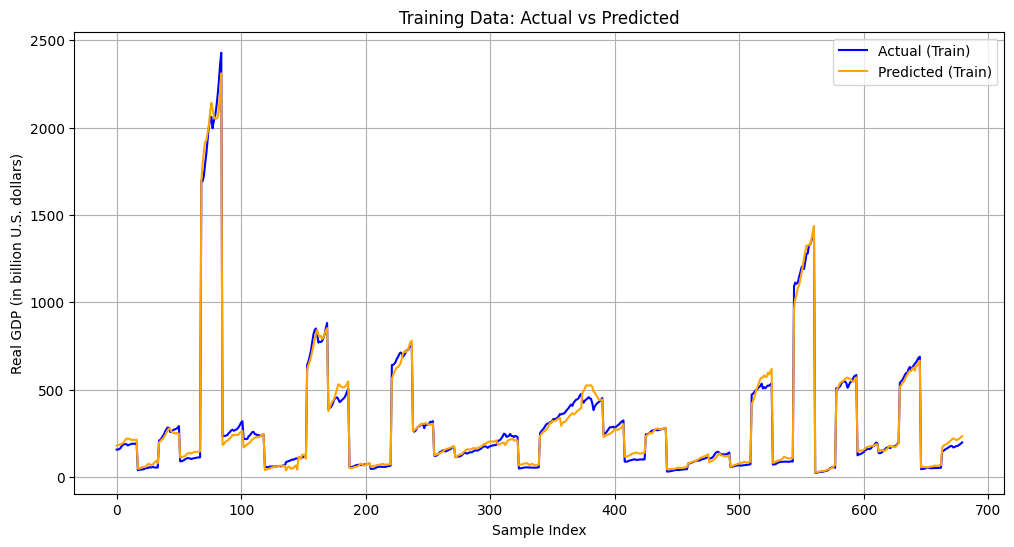

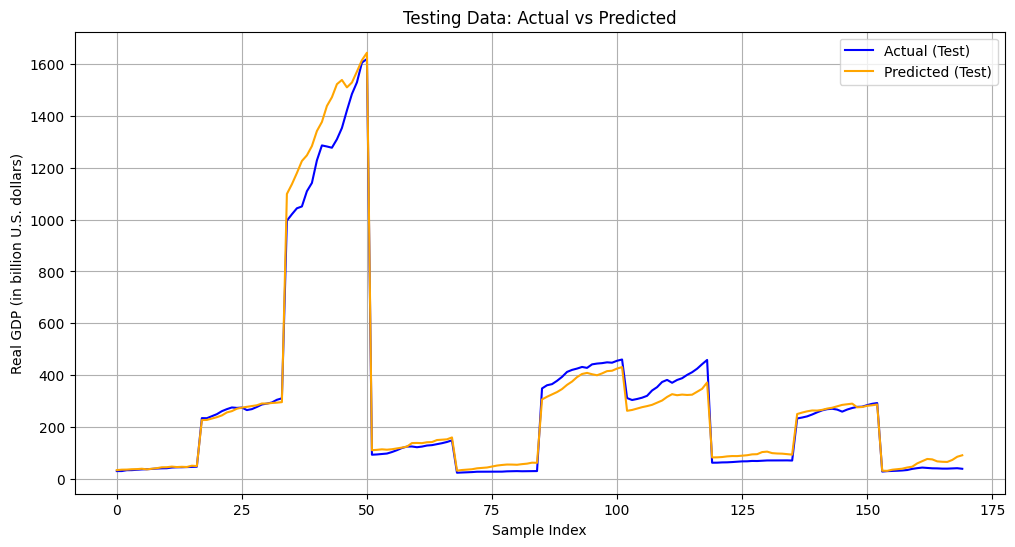

In [62]:
import matplotlib.pyplot as plt

# Plot for Training Data
plt.figure(figsize=(12, 6))
plt.plot(y_train_original, label='Actual (Train)', color='blue')
plt.plot(y_train_pred_original, label='Predicted (Train)', color='orange')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Real GDP (in billion U.S. dollars)')
plt.legend()
plt.grid(True)
plt.show()

# Plot for Testing Data
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual (Test)', color='blue')
plt.plot(y_test_pred_original, label='Predicted (Test)', color='orange')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Real GDP (in billion U.S. dollars)')
plt.legend()
plt.grid(True)
plt.show()


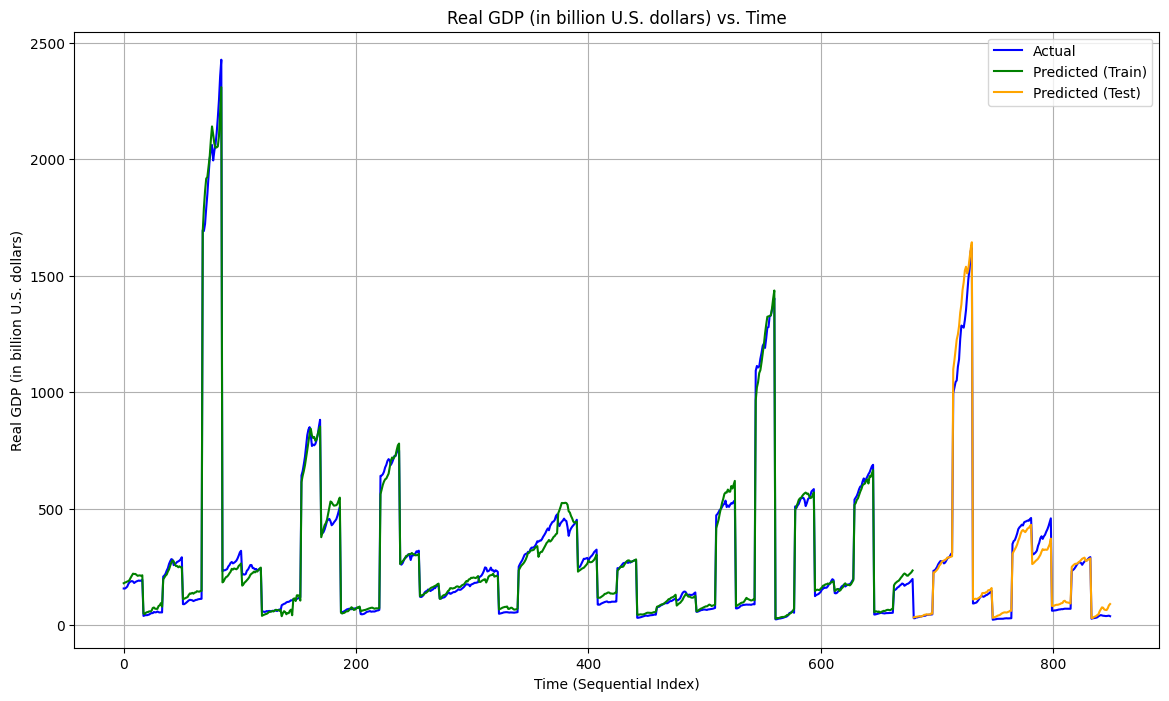

In [63]:
# Create a timeline for the actual data
timeline = np.arange(len(y_normalized))  # Assuming data is sequentially ordered

# Split the timeline into training and testing segments
timeline_train = timeline[:len(y_train_original)]
timeline_test = timeline[len(y_train_original):]

# Plotting Real GDP vs. Time
plt.figure(figsize=(14, 8))

# Plot actual values
plt.plot(timeline, scaler_target.inverse_transform(y_normalized), label='Actual', color='blue')

# Plot training predictions
plt.plot(timeline_train, y_train_pred_original, label='Predicted (Train)', color='green')

# Plot testing predictions
plt.plot(timeline_test, y_test_pred_original, label='Predicted (Test)', color='orange')

# Add labels, legend, and title
plt.title('Real GDP (in billion U.S. dollars) vs. Time')
plt.xlabel('Time (Sequential Index)')
plt.ylabel('Real GDP (in billion U.S. dollars)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


<font color= "lime"> <h1> <b> SHAP


In [64]:
! pip install shap

In [69]:
# Import SHAP and visualization libraries
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [71]:
# Ensure the LSTM model is trained
# If not already done, train the improved LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1) # Replace X_train_reshaped with X_train

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.3078e-04 - val_loss: 1.1769e-04
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2108e-04 - val_loss: 1.2006e-04
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0856e-04 - val_loss: 1.2074e-04
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9690e-04 - val_loss: 1.2670e-04
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8634e-04 - val_loss: 1.2207e-04
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.6890e-04 - val_loss: 1.1937e-04
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1399e-04 - val_loss: 1.6460e-04
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1017e-04 - val_loss: 1.2331e-04
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9727e-04 - val_loss: 1.2173e-04
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7491e-04 - val_loss: 1.2327e-04
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8465e-04 - val_loss: 1.1785

In [75]:
# Scale the X_test data using the previously defined scaler_features
X_test_scaled = scaler_features.transform(X_test.reshape(X_test.shape[0], -1))

# Get the original feature names from the scaler_features
original_feature_names = features_columns  # Use the features_columns defined earlier

# Convert reshaped X_test into a DataFrame for SHAP with feature names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=original_feature_names)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [76]:
# Custom wrapper function to make the LSTM model compatible with SHAP
def model_predict(input_data):
    # Convert 2D input to 3D for LSTM
    reshaped_input = np.reshape(input_data, (input_data.shape[0], 1, input_data.shape[1]))
    return model.predict(reshaped_input)


In [77]:
# Initialize the SHAP Explainer using the custom prediction wrapper
explainer = shap.Explainer(model_predict, X_test_scaled_df)

In [78]:
# Compute SHAP values for the test set
shap_values = explainer(X_test_scaled_df)

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:   4%|▎         | 6/170 [00:00<?, ?it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:   5%|▍         | 8/170 [00:10<00:47,  3.38it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:   5%|▌         | 9/170 [00:11<01:03,  2.54it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:   6%|▌         | 10/170 [00:11<01:10,  2.28it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:   6%|▋         | 11/170 [00:12<01:12,  2.18it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:   7%|▋         | 12/170 [00:12<01:09,  2.27it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:   8%|▊         | 13/170 [00:13<01:08,  2.30it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:   8%|▊         | 14/170 [00:13<01:05,  2.40it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:   9%|▉         | 15/170 [00:13<01:09,  2.23it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:   9%|▉         | 16/170 [00:14<01:04,  2.38it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  10%|█         | 17/170 [00:14<01:04,  2.38it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  11%|█         | 18/170 [00:15<01:04,  2.36it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  11%|█         | 19/170 [00:15<01:02,  2.43it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  12%|█▏        | 20/170 [00:15<01:00,  2.49it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  12%|█▏        | 21/170 [00:16<00:58,  2.54it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  13%|█▎        | 22/170 [00:16<01:03,  2.32it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  14%|█▎        | 23/170 [00:17<01:01,  2.38it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  14%|█▍        | 24/170 [00:17<01:00,  2.43it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  15%|█▍        | 25/170 [00:18<00:59,  2.44it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  15%|█▌        | 26/170 [00:18<01:02,  2.30it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  16%|█▌        | 27/170 [00:18<01:02,  2.28it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  16%|█▋        | 28/170 [00:19<01:04,  2.20it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  17%|█▋        | 29/170 [00:19<01:05,  2.14it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  18%|█▊        | 30/170 [00:20<01:07,  2.08it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  18%|█▊        | 31/170 [00:21<01:12,  1.92it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  19%|█▉        | 32/170 [00:21<01:13,  1.88it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  19%|█▉        | 33/170 [00:22<01:27,  1.56it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  20%|██        | 34/170 [00:23<01:30,  1.51it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  21%|██        | 35/170 [00:24<01:39,  1.36it/s]

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  21%|██        | 36/170 [00:24<01:35,  1.40it/s]

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  22%|██▏       | 37/170 [00:25<01:41,  1.31it/s]

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  22%|██▏       | 38/170 [00:26<01:26,  1.53it/s]

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  23%|██▎       | 39/170 [00:26<01:14,  1.75it/s]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  24%|██▎       | 40/170 [00:26<01:11,  1.82it/s]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  24%|██▍       | 41/170 [00:27<01:09,  1.86it/s]

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  25%|██▍       | 42/170 [00:28<01:07,  1.89it/s]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  25%|██▌       | 43/170 [00:28<01:02,  2.02it/s]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  26%|██▌       | 44/170 [00:28<01:02,  2.01it/s]

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  26%|██▋       | 45/170 [00:29<01:01,  2.03it/s]

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  27%|██▋       | 46/170 [00:29<00:58,  2.14it/s]

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  28%|██▊       | 47/170 [00:30<00:55,  2.22it/s]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  28%|██▊       | 48/170 [00:30<00:57,  2.12it/s]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  29%|██▉       | 49/170 [00:31<00:55,  2.20it/s]

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  29%|██▉       | 50/170 [00:31<00:56,  2.12it/s]

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  30%|███       | 51/170 [00:32<00:54,  2.20it/s]

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  31%|███       | 52/170 [00:32<00:51,  2.29it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  31%|███       | 53/170 [00:32<00:52,  2.21it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  32%|███▏      | 54/170 [00:33<00:50,  2.31it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  32%|███▏      | 55/170 [00:33<00:52,  2.18it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  33%|███▎      | 56/170 [00:34<00:54,  2.10it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  34%|███▎      | 57/170 [00:34<00:52,  2.17it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  34%|███▍      | 58/170 [00:35<00:57,  1.96it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  35%|███▍      | 59/170 [00:36<00:59,  1.85it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  35%|███▌      | 60/170 [00:36<01:00,  1.83it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  36%|███▌      | 61/170 [00:37<01:11,  1.53it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  36%|███▋      | 62/170 [00:38<01:07,  1.59it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  37%|███▋      | 63/170 [00:38<01:06,  1.61it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  38%|███▊      | 64/170 [00:39<01:04,  1.64it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  38%|███▊      | 65/170 [00:40<01:11,  1.47it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  39%|███▉      | 66/170 [00:40<01:01,  1.70it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  39%|███▉      | 67/170 [00:41<00:58,  1.76it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  40%|████      | 68/170 [00:41<00:55,  1.84it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  41%|████      | 69/170 [00:41<00:51,  1.97it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  41%|████      | 70/170 [00:42<00:46,  2.15it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  42%|████▏     | 71/170 [00:42<00:48,  2.06it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  42%|████▏     | 72/170 [00:43<00:45,  2.18it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  43%|████▎     | 73/170 [00:43<00:46,  2.10it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  44%|████▎     | 74/170 [00:44<00:43,  2.21it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  44%|████▍     | 75/170 [00:44<00:40,  2.33it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  45%|████▍     | 76/170 [00:44<00:41,  2.25it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  45%|████▌     | 77/170 [00:45<00:40,  2.28it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  46%|████▌     | 78/170 [00:45<00:41,  2.20it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  46%|████▋     | 79/170 [00:46<00:42,  2.16it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  47%|████▋     | 80/170 [00:46<00:39,  2.28it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  48%|████▊     | 81/170 [00:47<00:41,  2.15it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  48%|████▊     | 82/170 [00:47<00:42,  2.08it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  49%|████▉     | 83/170 [00:48<00:39,  2.19it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  49%|████▉     | 84/170 [00:48<00:40,  2.13it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  50%|█████     | 85/170 [00:49<00:41,  2.06it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  51%|█████     | 86/170 [00:49<00:40,  2.06it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  51%|█████     | 87/170 [00:50<00:41,  2.01it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  52%|█████▏    | 88/170 [00:50<00:45,  1.80it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  52%|█████▏    | 89/170 [00:51<00:55,  1.45it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  53%|█████▎    | 90/170 [00:52<00:52,  1.52it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  54%|█████▎    | 91/170 [00:53<00:57,  1.37it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  54%|█████▍    | 92/170 [00:54<00:53,  1.45it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  55%|█████▍    | 93/170 [00:54<00:50,  1.52it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  55%|█████▌    | 94/170 [00:55<00:44,  1.72it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  56%|█████▌    | 95/170 [00:55<00:41,  1.81it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  56%|█████▋    | 96/170 [00:56<00:39,  1.86it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  57%|█████▋    | 97/170 [00:56<00:35,  2.03it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  58%|█████▊    | 98/170 [00:56<00:33,  2.17it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  58%|█████▊    | 99/170 [00:57<00:34,  2.07it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  59%|█████▉    | 100/170 [00:57<00:31,  2.19it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  59%|█████▉    | 101/170 [00:58<00:30,  2.25it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  60%|██████    | 102/170 [00:58<00:31,  2.13it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  61%|██████    | 103/170 [00:59<00:30,  2.23it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  61%|██████    | 104/170 [00:59<00:30,  2.15it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  62%|██████▏   | 105/170 [01:00<00:31,  2.10it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  62%|██████▏   | 106/170 [01:00<00:31,  2.04it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  63%|██████▎   | 107/170 [01:01<00:30,  2.10it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  64%|██████▎   | 108/170 [01:01<00:29,  2.07it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  64%|██████▍   | 109/170 [01:01<00:28,  2.14it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  65%|██████▍   | 110/170 [01:02<00:28,  2.08it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  65%|██████▌   | 111/170 [01:02<00:26,  2.22it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  66%|██████▌   | 112/170 [01:03<00:24,  2.34it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  66%|██████▋   | 113/170 [01:03<00:24,  2.37it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  67%|██████▋   | 114/170 [01:04<00:25,  2.22it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  68%|██████▊   | 115/170 [01:04<00:23,  2.30it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  68%|██████▊   | 116/170 [01:05<00:31,  1.74it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  69%|██████▉   | 117/170 [01:06<00:30,  1.74it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  69%|██████▉   | 118/170 [01:06<00:31,  1.65it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  70%|███████   | 119/170 [01:07<00:30,  1.67it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  71%|███████   | 120/170 [01:08<00:34,  1.45it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  71%|███████   | 121/170 [01:08<00:33,  1.46it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  72%|███████▏  | 122/170 [01:09<00:30,  1.60it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  72%|███████▏  | 123/170 [01:09<00:27,  1.69it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  73%|███████▎  | 124/170 [01:10<00:24,  1.89it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  74%|███████▎  | 125/170 [01:10<00:21,  2.07it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  74%|███████▍  | 126/170 [01:11<00:20,  2.10it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  75%|███████▍  | 127/170 [01:11<00:20,  2.08it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  75%|███████▌  | 128/170 [01:12<00:20,  2.05it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  76%|███████▌  | 129/170 [01:12<00:20,  2.03it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  76%|███████▋  | 130/170 [01:13<00:19,  2.03it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  77%|███████▋  | 131/170 [01:13<00:19,  2.00it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  78%|███████▊  | 132/170 [01:14<00:19,  1.99it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  78%|███████▊  | 133/170 [01:14<00:17,  2.15it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  79%|███████▉  | 134/170 [01:14<00:16,  2.21it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  79%|███████▉  | 135/170 [01:15<00:16,  2.11it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  80%|████████  | 136/170 [01:15<00:15,  2.23it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  81%|████████  | 137/170 [01:16<00:14,  2.26it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  81%|████████  | 138/170 [01:16<00:13,  2.37it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  82%|████████▏ | 139/170 [01:17<00:12,  2.40it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  82%|████████▏ | 140/170 [01:17<00:12,  2.40it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  83%|████████▎ | 141/170 [01:17<00:12,  2.24it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  84%|████████▎ | 142/170 [01:18<00:13,  2.15it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  84%|████████▍ | 143/170 [01:18<00:12,  2.23it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  85%|████████▍ | 144/170 [01:19<00:12,  2.06it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  85%|████████▌ | 145/170 [01:20<00:13,  1.88it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  86%|████████▌ | 146/170 [01:20<00:13,  1.83it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  86%|████████▋ | 147/170 [01:21<00:12,  1.81it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


ExactExplainer explainer:  87%|████████▋ | 148/170 [01:21<00:12,  1.71it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  88%|████████▊ | 149/170 [01:22<00:14,  1.42it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  88%|████████▊ | 150/170 [01:23<00:14,  1.41it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  89%|████████▉ | 151/170 [01:24<00:12,  1.55it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  89%|████████▉ | 152/170 [01:24<00:10,  1.66it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  90%|█████████ | 153/170 [01:25<00:09,  1.74it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  91%|█████████ | 154/170 [01:25<00:08,  1.92it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  91%|█████████ | 155/170 [01:26<00:07,  1.93it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  92%|█████████▏| 156/170 [01:26<00:06,  2.09it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  92%|█████████▏| 157/170 [01:26<00:05,  2.17it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  93%|█████████▎| 158/170 [01:27<00:05,  2.13it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  94%|█████████▎| 159/170 [01:27<00:05,  2.08it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  94%|█████████▍| 160/170 [01:28<00:04,  2.03it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  95%|█████████▍| 161/170 [01:28<00:04,  2.15it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  95%|█████████▌| 162/170 [01:29<00:03,  2.22it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  96%|█████████▌| 163/170 [01:29<00:03,  2.16it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  96%|█████████▋| 164/170 [01:30<00:02,  2.22it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  97%|█████████▋| 165/170 [01:30<00:02,  2.14it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  98%|█████████▊| 166/170 [01:31<00:01,  2.16it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  98%|█████████▊| 167/170 [01:31<00:01,  2.10it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  99%|█████████▉| 168/170 [01:32<00:00,  2.03it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  99%|█████████▉| 169/170 [01:32<00:00,  2.00it/s]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer: 100%|██████████| 170/170 [01:32<00:00,  2.11it/s]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer: 171it [01:33,  1.76it/s]


In [79]:
# --- 1. Force Plot (Local Explanation for One Prediction) ---
shap.initjs()  # Initialize JavaScript visualization
single_prediction = 0  # Index of the test sample to explain
shap.force_plot(
    shap_values.base_values[single_prediction],  # Use base_values instead of expected_value
    shap_values.values[single_prediction],  # Access the SHAP values directly
    X_test_scaled_df.iloc[single_prediction]
)

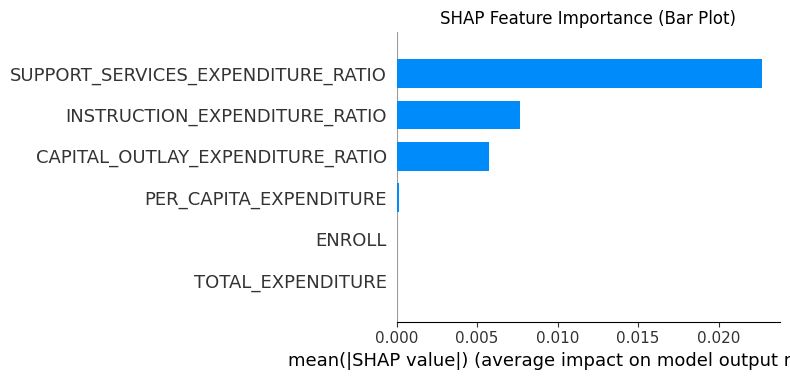

In [80]:
# --- 2. Feature Importance (Global Explanation) ---
# Bar plot of mean absolute SHAP values
plt.title("SHAP Feature Importance (Bar Plot)")
shap.summary_plot(shap_values, X_test_scaled_df, plot_type="bar")

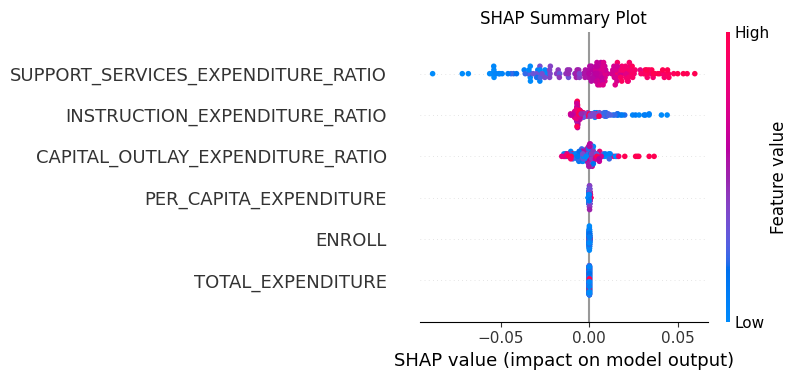

In [81]:
# --- 3. Summary Plot (Global Explanation of Feature Impacts) ---
# Distribution of SHAP values for each feature
plt.title("SHAP Summary Plot")
shap.summary_plot(shap_values, X_test_scaled_df)